# <center>Flight Price Prediction</center>

# <h2>Importing the Libraries</h2>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv('goibibo_flights_data.csv')
data.head(10)

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN
5,26-06-2023,Vistara,UK-945,economy,Delhi,11:40,Mumbai,14:00,02h 20m,"6,015",non-stop,NaN,NaN
6,26-06-2023,Vistara,UK-927,economy,Delhi,09:30,Mumbai,11:35,02h 05m,"6,121",non-stop,NaN,NaN
7,26-06-2023,Vistara,UK-951,economy,Delhi,14:20,Mumbai,16:30,02h 10m,"6,121",non-stop,NaN,NaN
8,26-06-2023,GO FIRST,G8-334,economy,Delhi,08:00,Mumbai,10:10,02h 10m,"6,014",non-stop,NaN,NaN
9,26-06-2023,GO FIRST,G8-336,economy,Delhi,14:20,Mumbai,16:35,02h 15m,"6,014",non-stop,NaN,NaN


# EDA

In [53]:
data.isnull().sum()

flight date         0
airline             0
flight_num          0
class               0
from                0
dep_time            0
to                  0
arr_time            0
duration            0
price               0
stops               0
Unnamed: 11    300261
Unnamed: 12    300261
dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   flight date  300261 non-null  object 
 1   airline      300261 non-null  object 
 2   flight_num   300261 non-null  object 
 3   class        300261 non-null  object 
 4   from         300261 non-null  object 
 5   dep_time     300261 non-null  object 
 6   to           300261 non-null  object 
 7   arr_time     300261 non-null  object 
 8   duration     300261 non-null  object 
 9   price        300261 non-null  object 
 10  stops        300261 non-null  object 
 11  Unnamed: 11  0 non-null       float64
 12  Unnamed: 12  0 non-null       float64
dtypes: float64(2), object(11)
memory usage: 29.8+ MB


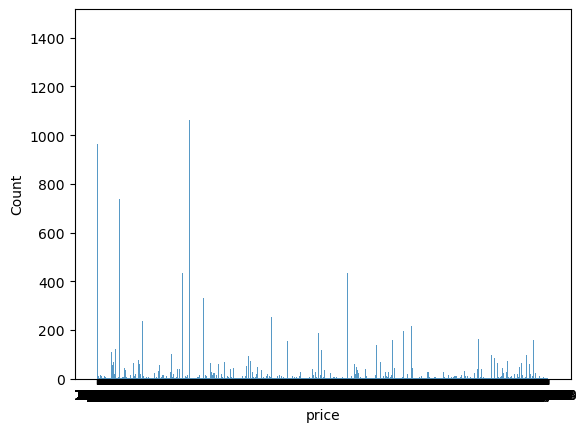

In [55]:
# Distribution of Prices

sns.histplot(data['price'])
plt.show()

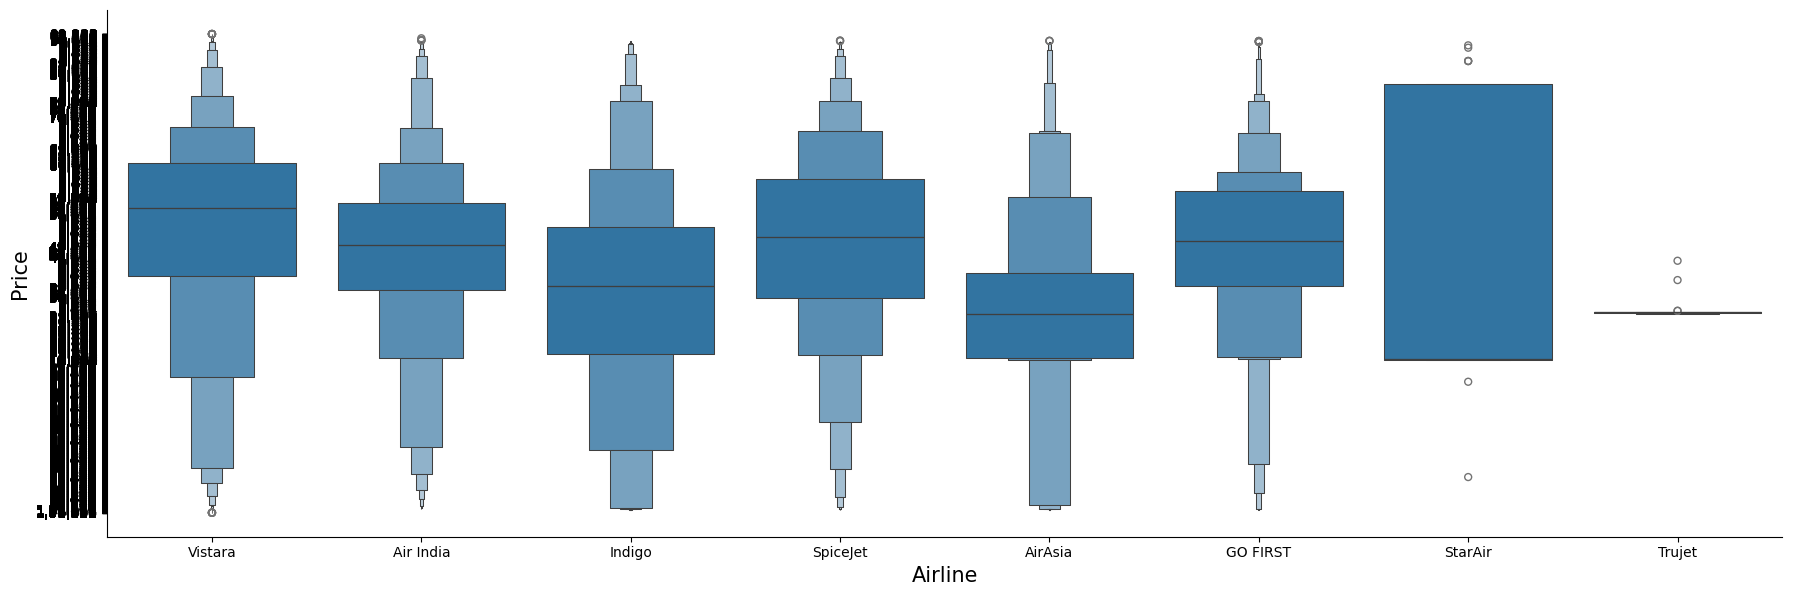

In [56]:
# Airline vs Price

sns.catplot(y = 'price', x = 'airline', data = data.sort_values('price', ascending=False),kind='boxen',height = 6, aspect = 3)
plt.xlabel('Airline',size=15)
plt.ylabel('Price',size=15)
plt.show()

# <h2>Feature Engineering / Data Preproccesing</h2>

In [58]:
data['dep_hour'] = pd.to_datetime(data['dep_time'].astype(str)).dt.hour
data['dep_min'] = pd.to_datetime(data['dep_time'].astype(str)).dt.minute
data

C:\Users\rites\AppData\Local\Temp\ipykernel_12720\3137448158.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dep_hour'] = pd.to_datetime(data['dep_time'].astype(str)).dt.hour
C:\Users\rites\AppData\Local\Temp\ipykernel_12720\3137448158.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dep_min'] = pd.to_datetime(data['dep_time'].astype(str)).dt.minute


,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12,dep_hour,dep_min
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN,18,55
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN,6,20
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN,4,25
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN,10,20
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN,8,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,13-08-2023,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,10h 05m,"70,304",1-stop,NaN,NaN,9,45
300257,13-08-2023,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10h 25m,"78,262",1-stop,NaN,NaN,12,30
300258,13-08-2023,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,13h 50m,"80,285",1-stop,NaN,NaN,7,5
300259,13-08-2023,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,10h 00m,"82,809",1-stop,NaN,NaN,7,0


In [59]:
data['arr_hour'] = pd.to_datetime(data['arr_time'].astype(str)).dt.hour
data['arr_min'] = pd.to_datetime(data['arr_time'].astype(str)).dt.minute
data

C:\Users\rites\AppData\Local\Temp\ipykernel_12720\2152656666.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['arr_hour'] = pd.to_datetime(data['arr_time'].astype(str)).dt.hour
C:\Users\rites\AppData\Local\Temp\ipykernel_12720\2152656666.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['arr_min'] = pd.to_datetime(data['arr_time'].astype(str)).dt.minute


,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12,dep_hour,dep_min,arr_hour,arr_min
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN,18,55,21,5
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN,6,20,8,40
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN,4,25,6,35
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN,10,20,12,35
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN,8,50,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,13-08-2023,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,10h 05m,"70,304",1-stop,NaN,NaN,9,45,19,50
300257,13-08-2023,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10h 25m,"78,262",1-stop,NaN,NaN,12,30,22,55
300258,13-08-2023,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,13h 50m,"80,285",1-stop,NaN,NaN,7,5,20,55
300259,13-08-2023,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,10h 00m,"82,809",1-stop,NaN,NaN,7,0,17,0


In [60]:
data['Journey_Day'] = pd.to_datetime(data['flight date']).dt.day
data['Journey_Month'] = pd.to_datetime(data['flight date']).dt.month
data

C:\Users\rites\AppData\Local\Temp\ipykernel_12720\1618214486.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Journey_Day'] = pd.to_datetime(data['flight date']).dt.day
C:\Users\rites\AppData\Local\Temp\ipykernel_12720\1618214486.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Journey_Month'] = pd.to_datetime(data['flight date']).dt.month


,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN,18,55,21,5,26,6
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN,6,20,8,40,26,6
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN,4,25,6,35,26,6
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN,10,20,12,35,26,6
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN,8,50,11,10,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,13-08-2023,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,10h 05m,"70,304",1-stop,NaN,NaN,9,45,19,50,13,8
300257,13-08-2023,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10h 25m,"78,262",1-stop,NaN,NaN,12,30,22,55,13,8
300258,13-08-2023,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,13h 50m,"80,285",1-stop,NaN,NaN,7,5,20,55,13,8
300259,13-08-2023,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,10h 00m,"82,809",1-stop,NaN,NaN,7,0,17,0,13,8


In [61]:
data.drop(['flight date','dep_time','arr_time'], axis = 1, inplace = True)
data

,airline,flight_num,class,from,to,duration,price,stops,Unnamed: 11,Unnamed: 12,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,SpiceJet,SG-8709,economy,Delhi,Mumbai,02h 10m,"6,013",non-stop,NaN,NaN,18,55,21,5,26,6
1,SpiceJet,SG-8157,economy,Delhi,Mumbai,02h 20m,"6,013",non-stop,NaN,NaN,6,20,8,40,26,6
2,AirAsia,I5-764,economy,Delhi,Mumbai,02h 10m,"6,016",non-stop,NaN,NaN,4,25,6,35,26,6
3,Vistara,UK-995,economy,Delhi,Mumbai,02h 15m,"6,015",non-stop,NaN,NaN,10,20,12,35,26,6
4,Vistara,UK-963,economy,Delhi,Mumbai,02h 20m,"6,015",non-stop,NaN,NaN,8,50,11,10,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK-822,business,Chennai,Hyderabad,10h 05m,"70,304",1-stop,NaN,NaN,9,45,19,50,13,8
300257,Vistara,UK-826,business,Chennai,Hyderabad,10h 25m,"78,262",1-stop,NaN,NaN,12,30,22,55,13,8
300258,Vistara,UK-832,business,Chennai,Hyderabad,13h 50m,"80,285",1-stop,NaN,NaN,7,5,20,55,13,8
300259,Vistara,UK-828,business,Chennai,Hyderabad,10h 00m,"82,809",1-stop,NaN,NaN,7,0,17,0,13,8


In [62]:
data['stops'].value_counts()

stops
1-stop                                                                          243603
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia J

In [63]:
data.replace({'non-stop ' : 0, '1-stop' : 1, '1-stopVia Indore' : 1,'1-stopVia Mumbai' : 1, '2+-stop' : 2,'1-stopVia IDR' : 1,'1-stopVia VTZ' : 1,'1-stopVia Delhi' : 1,'1-stopVia Bagdogra' : 1}, inplace=True)
data

,airline,flight_num,class,from,to,duration,price,stops,Unnamed: 11,Unnamed: 12,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,SpiceJet,SG-8709,economy,Delhi,Mumbai,02h 10m,"6,013",non-stop,NaN,NaN,18,55,21,5,26,6
1,SpiceJet,SG-8157,economy,Delhi,Mumbai,02h 20m,"6,013",non-stop,NaN,NaN,6,20,8,40,26,6
2,AirAsia,I5-764,economy,Delhi,Mumbai,02h 10m,"6,016",non-stop,NaN,NaN,4,25,6,35,26,6
3,Vistara,UK-995,economy,Delhi,Mumbai,02h 15m,"6,015",non-stop,NaN,NaN,10,20,12,35,26,6
4,Vistara,UK-963,economy,Delhi,Mumbai,02h 20m,"6,015",non-stop,NaN,NaN,8,50,11,10,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK-822,business,Chennai,Hyderabad,10h 05m,"70,304",1,NaN,NaN,9,45,19,50,13,8
300257,Vistara,UK-826,business,Chennai,Hyderabad,10h 25m,"78,262",1,NaN,NaN,12,30,22,55,13,8
300258,Vistara,UK-832,business,Chennai,Hyderabad,13h 50m,"80,285",1,NaN,NaN,7,5,20,55,13,8
300259,Vistara,UK-828,business,Chennai,Hyderabad,10h 00m,"82,809",1,NaN,NaN,7,0,17,0,13,8


In [64]:
data['stops'].value_counts()

stops
1                                                                               243603
non-stop                                                                         36044
2                                                                                13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia J

In [65]:
import re

duration_hours = []
duration_mins = []

for d in duration:
    hours_match = re.search(r'([\d.]+)h', d)
    mins_match = re.search(r'(\d+)m', d)
    
    if hours_match:
        duration_hours.append(float(hours_match.group(1)))
    else:
        duration_hours.append(0.0)
    
    if mins_match:
        duration_mins.append(int(mins_match.group(1)))
    else:
        duration_mins.append(0)


In [66]:
duration_str = '1.03h'
duration_hours = float(duration_str.replace('h', ''))

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    hour_part = duration[i].split('h')[0].strip()
    duration_hours.append(float(hour_part))

    # optional: if minutes are included
    if 'm' in duration[i]:
        minute_part = duration[i].split('m')[0].split()[-1].strip()
        duration_mins.append(int(minute_part))
    else:
        duration_mins.append(0)


ValueError: invalid literal for int() with base 10: '1.03h'

In [ ]:
data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins
data

In [ ]:
data.drop(['flight_duration'],axis=1,inplace=True)
data

In [ ]:
data['flight_name'].value_counts()

In [ ]:
Airline = data['flight_name']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

In [ ]:
list1 = ['departure_loc', 'arrival_loc']
for l in list1:
    print(data[[l]].value_counts(), '\n')

In [ ]:
data = pd.get_dummies(data = data, columns=list1, drop_first=True)
data

In [ ]:
data = pd.concat([data, Airline], axis = 1)
data

In [ ]:
data.drop(['flight_name'],axis=1,inplace=True)
data

# <h2>Feature Selection/Importance</h2>

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
X = data.loc[:, ['stops', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins',
       'departure_loc_Chennai', 'departure_loc_Delhi', 'departure_loc_Mumbai',
       'arrival_loc_Delhi', 'arrival_loc_Hyderabad', 'arrival_loc_Kolkata',
       'arrival_loc_Mumbai', 'AirAsia', 'AkasaAir', 'AllianceAir', 'GO FIRST',
       'Indigo', 'SpiceJet', 'StarAir', 'Vistara']]
X.head()

In [ ]:
y = data.iloc[:, 1]
y.head()

In [ ]:
plt.figure(figsize = (18, 18))
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn')

plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

In [ ]:
print(selection.feature_importances_)

In [ ]:
# Feature Importances

plt.figure(figsize = (12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

# <h2>Feature Scaling</h2>

In [ ]:
x = data.drop(['price'],axis=1)
y = data['price']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(x)

data1[0]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

# <h2><center>ExtraTreesRegressor Model</center></h2>

In [ ]:
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [ ]:
y_pred = selection.predict(x_test)

In [ ]:
metrics(y_test, y_pred)

In [ ]:
accuracy(y_test, y_pred)

# <h2><center>Linear Regression Model</center></h2>

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
metrics(y_test, y_pred)

In [ ]:
accuracy(y_test, y_pred)

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

# <h2><center>XGBoost Model</center></h2>

In [ ]:
import xgboost as xg

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

In [ ]:
xgb_r.fit(x_train, y_train)

In [ ]:
pred = xgb_r.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
metrics(y_test, pred)

In [ ]:
accuracy(y_test, pred)

In [ ]:
sns.distplot(y_test-pred)
plt.show()

# <center>Random Forest Model</center>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators = 100, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

In [ ]:
pred_rf = model_random_forest.predict(x_test)

In [ ]:
metrics(y_test, pred_rf)

In [ ]:
accuracy(y_test, pred_rf)

In [ ]:
sns.distplot(y_test-pred)
plt.show()

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.show()

# <h2>Saving the File</h2>

In [ ]:
import pickle

In [ ]:
model = model_random_forest
pickle.dump(model, open("flight.pkl",'wb'))